In [ ]:
import torch
torch.__version__



'1.13.1+cu116'

# Pytorch basics

This notebook intends to cover the basic aspects of Pytorch to build a first perceptron model.

## Import Pytorch

If running with google colab, google colab has a version of Pytorch already installed. This version can be invoked as follows:

In [ ]:
import torch as torch

## Tensors

Pytorch fully work with tensors which are a generalization of vectors and matrixes. A tensor can be invoked as follows:


In [ ]:
# Tensor of dimension 3x3x3
tensor = torch.empty(3,3,3)
print(tensor)
print(tensor.size())

tensor([[[3.8115e-43, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 9.1478e-41, 0.0000e+00],
         [4.2039e-45, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 1.1351e-43, 0.0000e+00],
         [4.5414e-33, 0.0000e+00, 3.8575e-33],
         [0.0000e+00, 2.3720e-33, 0.0000e+00]],

        [[1.3696e-25, 4.5818e-41, 4.4842e-44],
         [0.0000e+00, 1.5695e-43, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 4.4249e-33]]])
torch.Size([3, 3, 3])


In [ ]:
# Tensors have algebraic operations

x = torch.ones(3,3,3)
y = 2 * torch.ones(3,3,3)

print(x/y)

# Note that the operations are element by element


tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]]])


In general, the tensors work in a very similar way as numpy arrays. Indeed, numpy arrays can be converted into tensors as follows:

In [ ]:
import numpy as np

x = np.random.randint(10, size = (3,3))
print(x)
y = torch.from_numpy(x)
print(y)

[[2 8 5]
 [8 3 1]
 [0 5 2]]
tensor([[2, 8, 5],
        [8, 3, 1],
        [0, 5, 2]])


### Useful tensor transformation

Usually, the data that comes in $n\times m$ shape, but to feed our models (neurons) we probably need to reshape in $1\times nm$. A useful command to do this is:
 

In [ ]:
# generating a tensor 10X12 with random initial values

x = torch.rand(10,12)
print(x)

# reshaping to 1x120
x = x.view(-1)
print(x)
print(x.size())


tensor([[0.5448, 0.6031, 0.3020, 0.5482, 0.8872, 0.0957, 0.1448, 0.6719, 0.8035,
         0.4777, 0.3525, 0.5564],
        [0.4427, 0.6906, 0.2575, 0.5652, 0.8993, 0.7425, 0.5677, 0.7277, 0.6765,
         0.0301, 0.1968, 0.4787],
        [0.5882, 0.2999, 0.9371, 0.8860, 0.0375, 0.1262, 0.4942, 0.4601, 0.6908,
         0.5594, 0.8269, 0.7003],
        [0.5590, 0.5660, 0.5618, 0.1610, 0.7417, 0.2881, 0.5184, 0.2753, 0.5199,
         0.8744, 0.0283, 0.8493],
        [0.0015, 0.5077, 0.4037, 0.9802, 0.1217, 0.2562, 0.1507, 0.5397, 0.3177,
         0.6321, 0.5150, 0.7760],
        [0.1834, 0.8594, 0.0547, 0.0590, 0.7094, 0.1890, 0.0107, 0.4124, 0.9742,
         0.2483, 0.5601, 0.1027],
        [0.1035, 0.8992, 0.8328, 0.7140, 0.4063, 0.1062, 0.2218, 0.8107, 0.4232,
         0.4338, 0.2116, 0.2870],
        [0.4230, 0.8096, 0.1467, 0.0510, 0.2279, 0.6393, 0.6216, 0.0543, 0.9357,
         0.7315, 0.2514, 0.4108],
        [0.5891, 0.7003, 0.0814, 0.5821, 0.9798, 0.7470, 0.0962, 0.3272, 0.7928,

## GPU

An advantage of working with Pytorch is that we can use gpu thanks to integrated libraries. This is simply done as follows.

In [ ]:
from math import e
# First test if the gpus are available
if torch.cuda.is_available():
  print('yes')
else:
  print('no')

no


In [ ]:
print(torch.cuda.device_count())

0


## Gradients and backpropagation

Whe building a model, to optimize the loss function, it is necessary the computation of gradients. Pytorch has a libraary that allor for the computation of gradients easily. These package include backpropagation, that allows to accelerate the computation of gradients by using chain rule and memory storage of previous computations.

As an example, we will compute the gradient of $h(x) = g(f(x))$ with $f(x) = sin(x)$ and $g(x) = x^2$. We already know that the derivative would be $h'(x) = g'(f(x))f'(x) = 2sin(x)cos(x)$ which evaluated in 0.5 is $h'(0.5) \approx 0.84$ 

In [ ]:
# Set the variable 

x = torch.tensor(0.5, requires_grad=True) # Requires grad is necessary to compute with this variable
f = torch.sin(x)
h = f*f
h.backward() # This command push the code to perform the backward propagation, thus computing the grading and storing it on x.grad

# The gradient as expected is:
print(x.grad)
# Note that the derivative computed is dh/dx which is stored on x.grad


tensor(0.8415)


## Trying regression and perceptron

One of the simplest models to work with neural networks is a linear regression. For this reason, we will work the linear regression in different flavors. 

- First, we will try a regression computed from mathematical aspects that come from minimizing the cost function. 

- Then, we will compute the linear regression with our own optimization algorithm

- Then we will include the pytorch functionality to compute gradients 

- Finally, we will implement a full algorithm to compute linear regression using pytorch funtionalities. This is called perceptron.


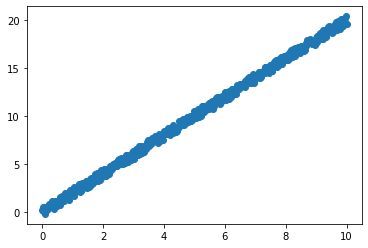

In [ ]:
# Generating linear data

# For the models we are going to train we need data. Here we generate noisy random linear data with a slope of 2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,500)
y = x * 0
for i in range(len(x)):
  rand = np.random.rand()
  rand = rand - .5
  y[i] = 2*x[i] + rand
plt.scatter(x,y)


### Mathematical linear regresion

This method is bases on the theretical optimization of the loss function which gives $w = (x^Tx)^{-1}x^Ty$

2.0036343693680814


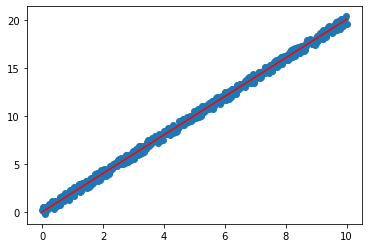

In [ ]:
# Matematical linear regression gotten with w = (x.T x)^(-1)x.T y

inverse = 1/np.matmul(x.T, x)
xy = np.matmul(x.T, y)
w = inverse * xy
print(w)

x_model = np.linspace(0,10,100)
y_model = w * x_model

plt.scatter(x,y)
plt.plot(x_model,y_model, color = 'red')

### Gradient minimization

For this linear regresion we will minimize the gradient function from scratch, going in the opposite direction of the gradient.

1.3370946793578578 0.2680655936522099
1.7818997229919347 0.029808729776034305
1.9298709399122889 0.0034417427319184345
1.979095833717457 0.0005238078843167922
1.9954712492919215 0.00020089105803693374
2.0009187823287173 0.000165155072779976
2.0027309877076918 0.0001612003062941357
2.003333845609314 0.00016076264722736966
2.0035343955324993 0.00016071421315182855
2.0036011115390098 0.00016070885313566153


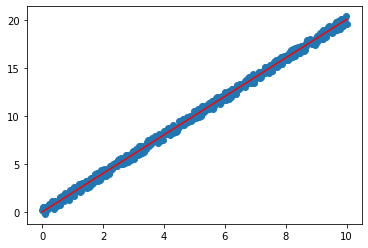

In [ ]:
# Regression step by step, using the same data as before
# In this case we will minimize the gradiend with gradiend descent

w = 0.0 # initial value for w
N = len(x)
# model prediction

def forward(w,x):
  return w*x

# loss function MSE = (1/N)(wx-y)**2
# loss
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()


# gardient(derivative of loss) DJ/Dw = (2x/N)(wx-y)
#gradient
def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()
n=10
learning = 0.01
for i in range(n):
  y_predicted = forward(w,x)
  J = loss(y,y_predicted)/N
  dw = gradient(x,y,y_predicted)/N
  w -= dw* learning
  print(w, J)

x_model = np.linspace(0,10,100)
y_model = w * x_model
plt.scatter(x,y)
plt.plot(x_model,y_model, color = 'red')

### Gradient with pytorch

In this part we will perform the same calculations as the last one but using the gradient computed from pytorch.

tensor(2.0036, requires_grad=True)


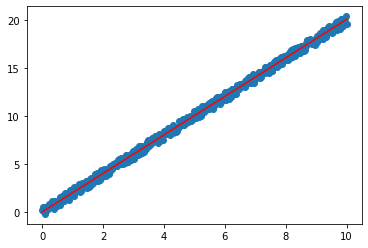

In [ ]:
 # Regresion using pytorch
#print(x.T)
X_temp = np.array([x])
X_temp = X_temp.T
X = torch.tensor(X_temp, dtype = torch.float32)
n_samples, n_features = X.shape
#print(n_samples, n_features)
Y_temp = np.array([y])
Y_temp = Y_temp.T
Y = torch.tensor(Y_temp, dtype = torch.float32) # It works with the features and labels ordered in columns


w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()/N

learning_rate = 0.01 # set a learning rate
loss = torch.nn.MSELoss() # Set the loss function to use
#optimizer = torch.optim.SGD(w, lr=learning_rate) # Set the optimizer
n=100
for i in range(n):
  y_pred = X * w # implement the linear model
  l = loss(Y,y_pred) # ipmlement the lost function
  l.backward() # compute the gradient of l
  #print(w.grad)
  with torch.no_grad():
    w -= learning_rate * w.grad # update the weights
  w.grad.zero_()
print(w)

#### Print the model ###
x_model = np.linspace(0,10,100)
y_model = w.item() * x_model
plt.scatter(x,y)
plt.plot(x_model,y_model, color = 'red')

### Full model with pytorch

Finally, our model can be computed completelly done with pytorch. Note that in this case, there is a pipeline to follow:

- Set the features vectors to the shape $n \times 1$ (This shape is needed by pytorch)
- Set the label vectors to the shape $n \times 1$
- Choose a model. In this case we choose the Linear model
- Choose the loss function. This function is built in pytorch and we choose MSEloss
- Choose the optimization method. In this case we choose SDG (Stochastic Descent Gradient) 

The latter part is the set up part. The, to run the model we should do the following in a loop:

- Compute the values predicted by the model using the initial features 
- Compute the loss function
- Compute the gradient
- Update the parameters of the model

With this, the final parameters give the model.

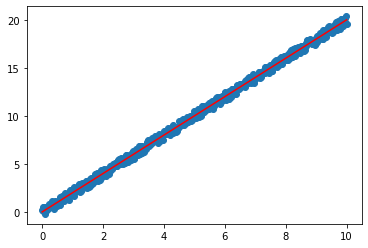

In [ ]:
 # Regresion using pytorch
#print(x.T)
#X = torch.from_numpy(x)
X_temp = np.array([x])
X_temp = X_temp.T
X = torch.tensor(X_temp, dtype = torch.float32)
#print(X.reshape(-1,1))
#X = X.reshape(-1,1)
n_samples, n_features = X.shape
#print(n_samples, n_features)

Y_temp = np.array([y])
Y_temp = Y_temp.T
Y = torch.tensor(Y_temp, dtype = torch.float32) # It works with the features and labels ordered in columns

input_size = n_features # How many features the system has (neurons)
output_size = n_features #

model = torch.nn.Linear(input_size, output_size) # Choose the model we wanna train, in this case linear



learning_rate = 0.01 # set a learning rate
loss = torch.nn.MSELoss() # Set the loss function to use
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Set the optimizer
n=1000
for i in range(n):
  y_pred = model(X) # implement the linear model
  l = loss(Y,y_pred) # ipmlement the lost function
  l.backward() # compute the gradient of l
  optimizer.step() # update the weights
  optimizer.zero_grad() # delete the residual values in the gradient
  [w, b] = model.parameters() # recover the parameters of the model
#print(i, w[0][0].item()) # print the parameters

#### Print the model ###
x_model = np.linspace(0,10,100)
y_model = w[0][0].item() * x_model
plt.scatter(x,y)
plt.plot(x_model,y_model, color = 'red')

## Multilinear regression

When working wiht data, it contains usually more than one feature (Linear regression). Here I generate data in 3D and plot it. Then, generate a model for the corresponding data. Note that the procedure is the same as described before.




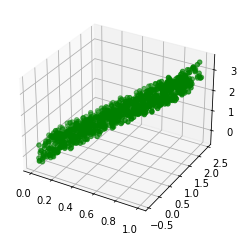

In [ ]:
# Generationg data


x = np.linspace(0,1,1000)
y = x * 0
z = x * 0
for i in range(len(x)):
  rand = np.random.rand()
  rand = rand - .5
  y[i] = 2*x[i] + rand

for i in range(len(x)):
  rand = np.random.rand()
  rand = rand - .5
  z[i] = 3*x[i] + rand

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, color = 'green')



In [ ]:

 # The first step will be generating the structured data
# Remember that the data is now in two vectors of lenght n, we need a tensor of dim nx2
data = np.array([x,z])
data = data.T

# Creating the tensor nx2
features = torch.tensor(data,dtype = torch.float32)

# Creating the labels nX1
labels_n = np.array([y])
labels_n = labels_n.T
labels = torch.tensor(labels_n, dtype=torch.float32)

n_features = features.shape[1]
n_labels = labels.shape[1]

# Setting the number of input and output neurons
input_size = n_features
output_size = n_labels

# Select the model to be trained in the neuron
model = torch.nn.Linear(input_size, output_size)


learning_rate = 0.001 # set a learning rate
loss = torch.nn.MSELoss() # Set the loss function to use
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Set the optimizer

n_iter = 10000


for i in range(n_iter):
  y_pred = model(features)
  l = loss(labels, y_pred)
  l.backward()
  optimizer.step() # update the weights
  optimizer.zero_grad() # delete the residual values in the gradient

w , b = model.parameters() # recover the parameters of the model

print(w, b)



Parameter containing:
tensor([[0.7839, 0.3507]], requires_grad=True) Parameter containing:
tensor([0.0830], requires_grad=True)


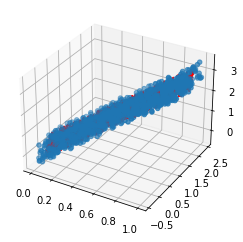

In [ ]:
# printing the rsulting data

x_model = x
z_model = z
y_model = w[0][0].item()*x_model + w[0][1].item()*z_model + b[0].item()

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.plot3D(x_model,y_model,z_model, color = 'red')
ax.scatter(x,y,z)